In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Laod and explore the data

In [2]:
# Load in the data
df = pd.read_csv('../Datasets/Yeast/yeast.csv')

# Have a look at the first 10 rows
df.head(5)

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,False,False,True,True,False,False,False,True,True,False
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,False,False,False,False,False,False,False,False,False,False
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,False,False,False,False,False,False,False,True,True,False
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,False,False,False,False,False,False,False,False,False,False
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,True,True,False,False,False,False,False,False,False,False


In [3]:
# Convert TRUE and FALSE to 1 and 0
for colname in df.loc[:, 'Class1':'Class14'].columns:
    df[colname] = df[colname].astype(int)

In [4]:
# Have a look at the dimensions
df.shape

(2417, 117)

In [5]:
# See how many of each category exists
for colname in df.loc[:, 'Class1':'Class14'].columns:
    count = df[colname].sum()
    print(f'{colname}: {count}')

Class1: 762
Class2: 1038
Class3: 983
Class4: 862
Class5: 722
Class6: 597
Class7: 428
Class8: 480
Class9: 178
Class10: 253
Class11: 289
Class12: 1816
Class13: 1799
Class14: 34


AxesSubplot(0.125,0.125;0.775x0.755)


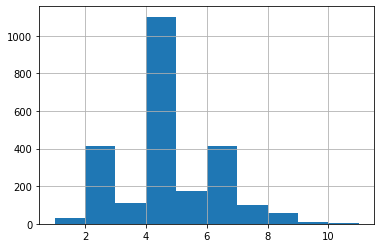

In [6]:
# See the distribution of categories per data point
y_df = df.loc[:, 'Class1':'Class14']
rowsums = y_df.sum(axis=1)
print(rowsums.hist())

### Process the data

In [7]:
# Get the independent variables
X = df.loc[:, 'Att1':'Att103'].values

In [8]:
# Get the labels
y = y_df.values

In [9]:
# Create the train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

### Build the model

In [10]:
# Define the layers of the model
i = Input(shape=(X_train.shape[1],))
x = Dense(200, activation='relu')(i)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = tf.keras.layers.Dense(14, activation='sigmoid')(x)

In [11]:
# Build the model
model = Model(i, x)

In [12]:
# Have a look at the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 103)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               20800     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 14)                2814      
Total params: 144,214
Trainable params: 144,214
Non-trainable params: 0
_______________________________________________________

In [13]:
# Define how the model should be trained
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

In [14]:
# Train the model
result = model.fit(X_train, y_train,
                   epochs=30,
                   validation_data=(X_test, y_test));

Train on 1812 samples, validate on 605 samples
Epoch 1/30
1812/1812 [==============================] - 1s 536us/sample - loss: 0.6827 - accuracy: 0.6954 - val_loss: 0.6702 - val_accuracy: 0.7560
Epoch 2/30
1812/1812 [==============================] - 0s 107us/sample - loss: 0.6467 - accuracy: 0.7656 - val_loss: 0.6147 - val_accuracy: 0.7698
Epoch 3/30
1812/1812 [==============================] - 0s 103us/sample - loss: 0.5704 - accuracy: 0.7676 - val_loss: 0.5273 - val_accuracy: 0.7698
Epoch 4/30
1812/1812 [==============================] - 0s 107us/sample - loss: 0.5081 - accuracy: 0.7676 - val_loss: 0.4980 - val_accuracy: 0.7698
Epoch 5/30
1812/1812 [==============================] - 0s 108us/sample - loss: 0.4943 - accuracy: 0.7676 - val_loss: 0.4917 - val_accuracy: 0.7698
Epoch 6/30
1812/1812 [==============================] - 0s 109us/sample - loss: 0.4895 - accuracy: 0.7676 - val_loss: 0.4882 - val_accuracy: 0.7698
Epoch 7/30
1812/1812 [==============================] - 0s 110us/

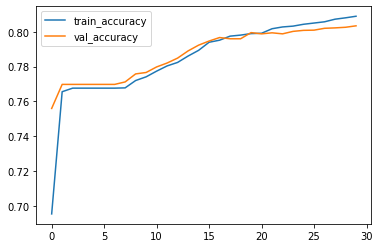

In [15]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='train_accuracy');
plt.plot(result.history['val_accuracy'], label='val_accuracy');
plt.legend();

In [16]:
# Make a prediction
for t in range(20):
    t = t + 100
    print(f'Predicted for {t}: {[0 if x < 0.5 else 1 for x in model.predict(np.array([X_test[t]]))[0]]}')
    print(f'Actual for {t}: {y_test[t]}')
    print('----------------------------------------------------')

Predicted for 100: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 100: [0 0 1 1 0 0 0 0 0 0 0 1 1 1]
----------------------------------------------------
Predicted for 101: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 101: [1 1 0 0 0 0 0 0 0 0 0 1 1 0]
----------------------------------------------------
Predicted for 102: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 102: [0 0 0 0 0 0 1 1 1 0 0 0 0 0]
----------------------------------------------------
Predicted for 103: [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 103: [0 1 1 0 0 0 0 0 0 0 0 1 1 0]
----------------------------------------------------
Predicted for 104: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 104: [0 0 0 0 1 1 0 0 0 0 0 1 1 0]
----------------------------------------------------
Predicted for 105: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Actual for 105: [1 1 0 0 0 0 0 0 0 0 0 1 1 0]
----------------------------------------------------
Predicted for 106: [0, 1, 0, 0, 0,

Looks like it doesn't work so well. I need a more formal performance metric, though. At least I got it to work! :D